In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from tslearn.metrics import dtw_path
from tslearn.metrics import dtw
from tslearn.metrics import ctw_path
from tslearn.utils import to_time_series
from matplotlib.patches import ConnectionPatch


In [3]:
pickle_path = "YOUR_PATH\\data\\pickels_v2\\aggregated_car_data_2016.pkl"
data = pd.read_pickle(pickle_path)

In [4]:
smaller = data[["lamId", "dayIndex", "direction", "CarCount"]]

In [5]:
lam12 = smaller[smaller["lamId"] == 1]
lam99 = smaller[smaller["lamId"] == 1430]

lam1 = lam12[lam12["direction"] == 1]
lam99 = lam12[lam12["direction"] == 2]

In [6]:
day1 = lam1[lam1["dayIndex"] == 4]["CarCount"].values[0]
day2 = lam99[lam99["dayIndex"] == 4]["CarCount"].values[0]

In [7]:
x = [i for i in range(288)]

In [8]:
def blur(data, blur_range):
  data_len = len(data)
  blurred = []
  for i in range(data_len):
    sum = 0
    count = 0
    for j in range(i-1, i+blur_range+1):
      if j < 0 or j > data_len-1:
        continue
      sum += data[j]
      count += 1
    sum += data[i]*2
    blurred.append(sum / (count+2))
  return blurred

In [9]:
blur_f = 10
b1 = blur(day1, blur_f)
b2 = blur(day2+50, blur_f)
b2_unmoved = blur(day2, blur_f)

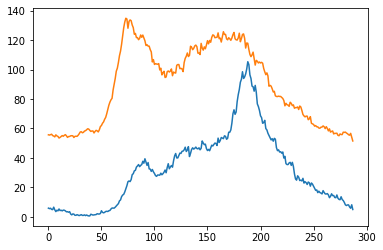

In [10]:
plt.plot(b1)
plt.plot(b2)

Dtw: 275.206281907558


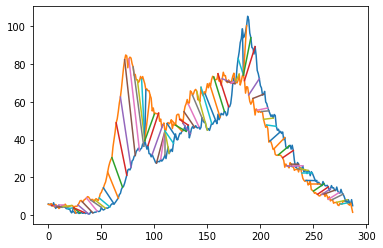

In [21]:
path, value = dtw_path(b1, b2_unmoved, global_constraint="sakoe_chiba", sakoe_chiba_radius=10)
print(f"Dtw: {value}")
plt.plot(x, b1)
plt.plot(x, b2_unmoved)

for i in range(len(path)):
  if i%4 == 0:
    pointsX = [path[i][0], path[i][1]]
    pointsY = (b1[path[i][0]], b2_unmoved[path[i][1]])
    plt.plot(pointsX, pointsY)


In [18]:
transformed_x = []
transformed_y = []
for i in range(len(path)):
  x_place = path[i][0]
  y_place = path[i][1]

  transformed_x.append(b1[x_place])
  transformed_y.append(b2_unmoved[y_place])
  # if x_place == y_place:
  #   transformed.append[b1[x_place]]
  # elif x_place > y_place:
  #   transformed.append[b1[x_place]]
  # elif x_place < y_place:
  #   transformed.append[b1[x_place]]


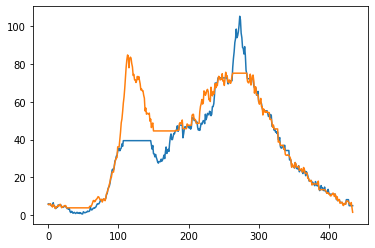

In [19]:
plt.plot(transformed_x)
plt.plot(transformed_y)

In [28]:
def get_lam_taffic(lam_id, direction, day):
  lam = smaller[smaller["lamId"] == lam_id]
  lam = lam[lam["direction"] == direction]
  lam = lam[lam["dayIndex"] == day]
  return lam["CarCount"].iloc[0]

In [47]:
lam119 = get_lam_taffic(119, 1, 4)
lam172 = get_lam_taffic(172, 1, 4)
lam176 = get_lam_taffic(176, 1, 4)
lam117 = get_lam_taffic(117, 1, 4)

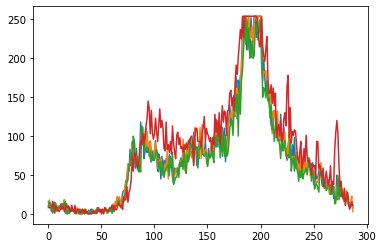

In [48]:
plt.plot(lam119)
plt.plot(lam172)
plt.plot(lam176)
plt.plot(lam117)

Dtw: 135.5433509988594


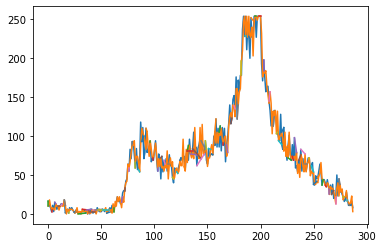

In [51]:
path, value = dtw_path(lam119, lam172, global_constraint="sakoe_chiba", sakoe_chiba_radius=10)
print(f"Dtw: {value}")
plt.plot(x, lam119)
plt.plot(x, lam172)

for i in range(len(path)):
  if i%4 == 0:
    pointsX = [path[i][0], path[i][1]]
    pointsY = (lam119[path[i][0]], lam172[path[i][1]])
    plt.plot(pointsX, pointsY)


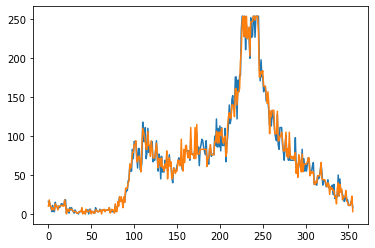

In [52]:
transformed_x = []
transformed_y = []
for i in range(len(path)):
  x_place = path[i][0]
  y_place = path[i][1]

  transformed_x.append(lam119[x_place])
  transformed_y.append(lam172[y_place])

plt.plot(transformed_x)
plt.plot(transformed_y)

In [54]:
dtw1 = dtw(lam119, lam172, global_constraint="sakoe_chiba", sakoe_chiba_radius=10)
dtw2 = dtw(lam119, lam176, global_constraint="sakoe_chiba", sakoe_chiba_radius=10)
dtw3 = dtw(lam119, lam117, global_constraint="sakoe_chiba", sakoe_chiba_radius=10)


In [55]:
print(dtw1, dtw2, dtw3)

135.5433509988594 133.13151392514095 245.7315608545227


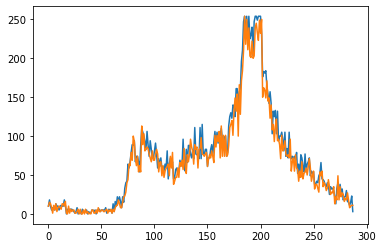

In [57]:
plt.plot(lam172)
plt.plot(lam176)

,lamId,dayIndex,direction,CarCount
0,1,1,1,"[5, 5, 6, 5, 1, 1, 1, 1, 3, 3, 10, 5, 3, 6, 8,..."
1,1,1,2,"[3, 10, 5, 5, 3, 1, 6, 1, 10, 8, 3, 8, 1, 5, 1..."
0,1,2,1,"[8, 3, 5, 3, 5, 6, 6, 6, 6, 6, 1, 0, 0, 1, 3, ..."
1,1,2,2,"[1, 5, 3, 5, 6, 8, 5, 5, 0, 3, 5, 8, 1, 6, 11,..."
0,1,3,1,"[6, 6, 5, 0, 1, 8, 6, 5, 5, 11, 11, 3, 8, 6, 1..."
...,...,...,...,...
1,1,364,2,"[8, 1, 5, 5, 6, 1, 3, 3, 3, 1, 1, 3, 1, 0, 1, ..."
0,1,365,1,"[10, 3, 10, 11, 3, 1, 6, 5, 1, 11, 1, 1, 1, 5,..."
1,1,365,2,"[3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 5, 8, 5, 1, 1, ..."
0,1,366,1,"[33, 28, 18, 38, 32, 20, 8, 3, 6, 13, 8, 10, 6..."


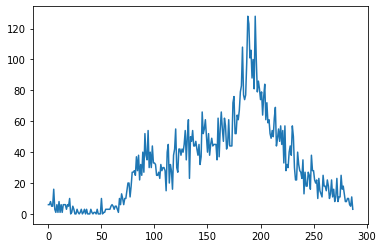

In [66]:
plt.plot(b1[0])

In [70]:
b2

[]

In [83]:
len(day1)

1

In [85]:
lam1[lam1["dayIndex"] == 4]

,lamId,dayIndex,direction,CarCount
0,1,4,1,"[6, 6, 8, 5, 5, 16, 3, 1, 6, 1, 8, 1, 6, 1, 6,..."


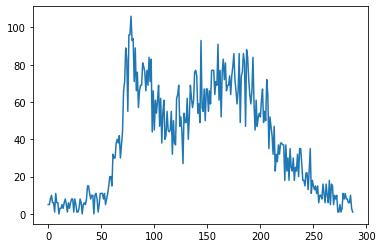

In [92]:
plt.plot(lam99[lam99["dayIndex"] == 4]["CarCount"].values[0])

In [91]:
lam99[lam99["dayIndex"] == 4]["CarCount"].values[0]

array([  5,   5,   8,  10,   6,   6,   1,  11,   6,   6,   0,   3,   3,
         5,   3,   6,   8,   5,   1,   6,   3,   6,   8,   8,   1,   8,
         5,   1,   1,   3,   8,   6,   0,   5,   6,   5,   8,  15,  15,
        11,   8,  10,  10,   0,  10,  11,   8,   1,   5,  11,  11,  11,
         8,  11,   5,   8,  11,  15,  20,  20,  15,  32,  30,  30,  38,
        40,  38,  42,  30,  37,  44,  66,  71,  89,  83,  55,  96,  96,
       106,  93,  94,  71,  89,  66,  76,  57,  66,  69,  69,  81,  79,
        76,  66,  77,  69,  84,  71,  83,  44,  66,  45,  61,  54,  61,
        69,  47,  62,  38,  54,  61,  40,  42,  55,  45,  44,  45,  55,
        32,  50,  38,  37,  62,  64,  69,  47,  52,  44,  27,  54,  49,
        49,  62,  40,  52,  69,  62,  57,  61,  76,  77,  74,  54,  59,
        49,  93,  57,  55,  67,  50,  67,  67,  55,  66,  59,  77,  77,
        77,  64,  71,  69,  91,  61,  77,  52,  76,  83,  72,  81,  66,
        69,  69,  74,  64,  74,  79,  86,  72,  66,  59,  66,  8

In [58]:
lam107 = get_lam_taffic(107, 1, 4)
lam137 = get_lam_taffic(137, 1, 4)
lam108 = get_lam_taffic(108, 1, 4)
lam429 = get_lam_taffic(429, 1, 4)

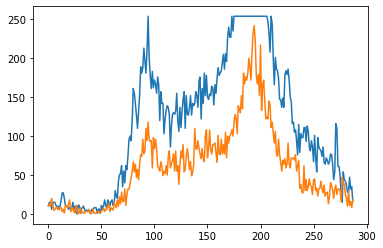

In [60]:
plt.plot(lam107)
plt.plot(lam429)

In [61]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.utils import to_time_series

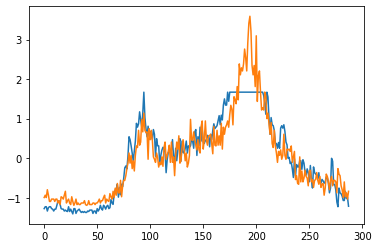

In [86]:
tsmv = TimeSeriesScalerMeanVariance()
scaled_107 = tsmv.fit_transform([to_time_series(lam107)])
scaled_429 = tsmv.fit_transform([to_time_series(lam429)])
plt.plot([i for i in range(len(lam107))], scaled_107[0])
plt.plot([i for i in range(len(lam429))], scaled_429[0])

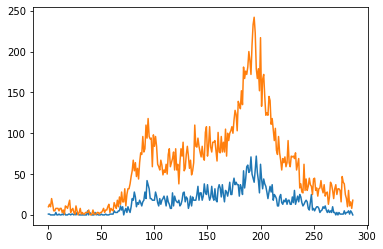

In [87]:
testlam = get_lam_taffic(430, 1, 4)
plt.plot(testlam)
plt.plot(lam429)

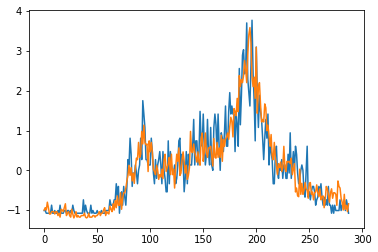

In [89]:
scaledtestlam = tsmv.fit_transform([to_time_series(testlam)])
plt.plot(scaledtestlam[0])
plt.plot(scaled_429[0])

Dtw: 4.379024600194448


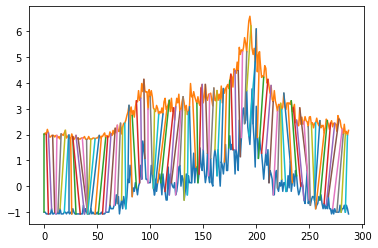

In [100]:
path, value = dtw_path(scaledtestlam[0], scaled_429[0], global_constraint="sakoe_chiba", sakoe_chiba_radius=10)

print(f"Dtw: {value}")
plt.plot(x, scaledtestlam[0])
plt.plot(x, scaled_429[0] + 3)

for i in range(len(path)):
  if i%4 == 0:
    pointsX = [path[i][0], path[i][1]]
    pointsY = (scaledtestlam[0][path[i][0]], (scaled_429[0] + 3)[path[i][1]])
    plt.plot(pointsX, pointsY)


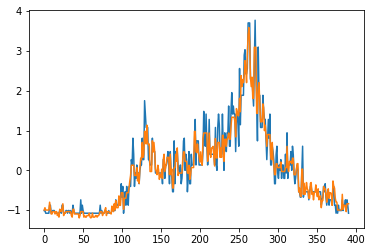

In [93]:
transformed_x = []
transformed_y = []
for i in range(len(path)):
  x_place = path[i][0]
  y_place = path[i][1]

  transformed_x.append(scaledtestlam[0][x_place])
  transformed_y.append(scaled_429[0][y_place])

plt.plot(transformed_x)
plt.plot(transformed_y)